

Macias hernandez Jonathan Alexis 1947881            
María de los Ángeles Tunales López 2077818    
Ernesto Alan Acero Quiroz 2077428      
Salas Garcia Victor Hugo 2035458

In [1]:

import cv2
from sklearn.model_selection import train_test_split
import numpy as np
import glob
import os
import tensorflow as tf
import numpy as np

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
!pip install kaggle
from google.colab import files

In [3]:
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"jonathanal","key":"c72b742632ff37ef8a5259b230155b44"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [6]:
!kaggle datasets download -d l3llff/flowers


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [7]:
import zipfile

# Ruta al archivo ZIP descargado
zip_file_path = '/content/archive (1).zip'

# Ruta a la carpeta donde deseas descomprimir el archivo
extracted_folder_path = '/content/archivo1'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)



In [8]:
imagenes = []
etiquetas = []

In [ ]:

# Ruta de la carpeta principal
carpeta_principal = '/content/archivo1/flowers'

# Patrón para encontrar todas las subcarpetas dentro de la carpeta principal
patron =os.path.join(carpeta_principal, '*')

# Utiliza glob para encontrar todas las subcarpetas que coinciden con el patrón
subcarpetas = glob.glob(patron)

# Itera sobre las subcarpetas encontradas
z = 0
for subcarpeta in subcarpetas:

    if os.path.isdir(subcarpeta):
        print('Subcarpeta:', subcarpeta)
        # Haz algo con la subcarpeta si es necesario

        for x in glob.iglob(f'{subcarpeta}/*.jpg'):
          print(x)
          test_image = cv2.imread(x)

          # Formato de imagen
          img_resized = cv2.resize(test_image, (128,128), )

          # Guardar imagenes y etiquetas
          arreglo_imagen = np.array(img_resized)
          imagenes.append(arreglo_imagen)
          etiquetas.append(z)
    z += 1

In [10]:
etiquetas = np.array(etiquetas)

In [11]:
imagenes = np.array(imagenes)

In [12]:
np.shape(imagenes)

(15740, 128, 128, 3)

In [14]:
len(etiquetas)

15740

In [15]:
etiquetas[-1]

15

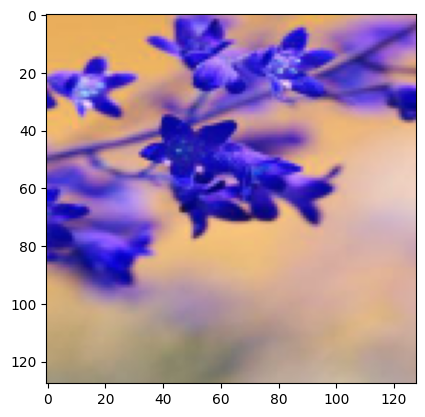

In [16]:

plt.imshow(imagenes[60])

In [17]:
pip install scikit-learn

In [18]:
from sklearn.model_selection import train_test_split

# Supongamos que tienes datos X e Y que deseas dividir
# X e Y pueden ser, por ejemplo, imágenes y etiquetas

# Dividir en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, Y_train, Y_test = train_test_split(imagenes, etiquetas, test_size=0.2, random_state=42)

In [19]:
# Convertir listas a arrays de NumPy
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

print("Train set shapes - imagenes:", X_train.shape, " etiquetas:", Y_train.shape)

Train set shapes - imagenes: (12592, 128, 128, 3)  etiquetas: (12592,)


In [20]:
print("Test set shapes - images:", X_test.shape, " etiquetas:", Y_test.shape)

Test set shapes - images: (3148, 128, 128, 3)  etiquetas: (3148,)


In [21]:
# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

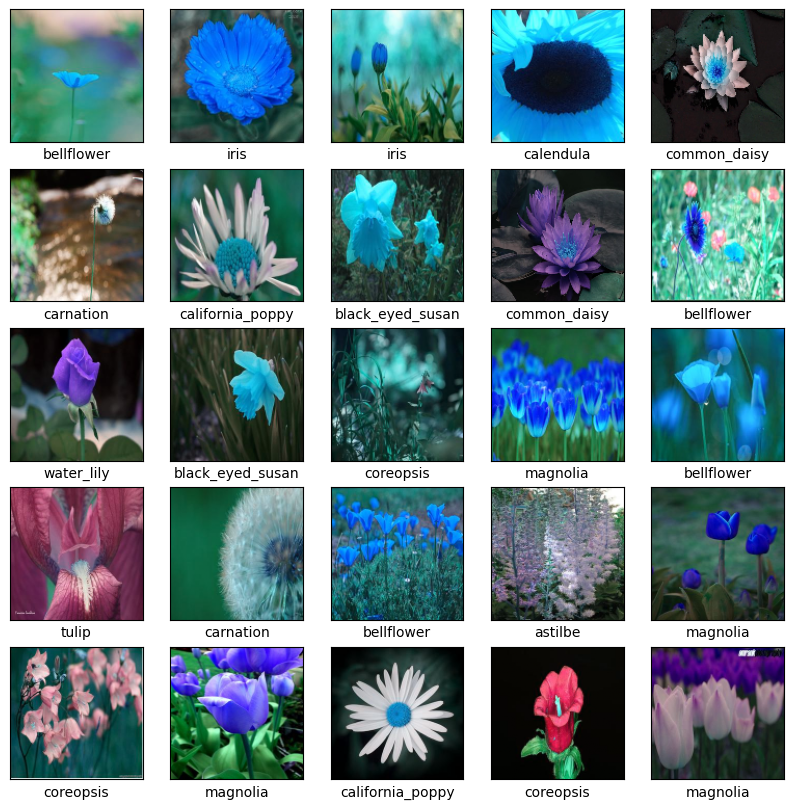

In [22]:
class_names = ['astilbe', 'bellflower','black_eyed_susan','calendula',
               'california_poppy','carnation','common_daisy','coreopsis','daffodil', 'dandelion',
               'iris','magnolia','rose','sunflower','tulip','water_lily']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[Y_train[i]])
plt.show()

In [23]:
modelo = models.Sequential()
modelo.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
modelo.add(layers.MaxPooling2D((2, 2)))
modelo.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelo.add(layers.MaxPooling2D((2, 2)))
modelo.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelo.add(layers.MaxPooling2D((2, 2)))
modelo.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelo.add(layers.MaxPooling2D((2, 2)))
modelo.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelo.add(layers.MaxPooling2D((2, 2)))


In [24]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0

In [25]:
modelo.add(layers.Flatten())
modelo.add(layers.Dense(64, activation='relu'))
modelo.add(layers.Dense(16))

In [26]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0

In [27]:
# Load the dataset.
X_train, X_test, Y_train, Y_test =  train_test_split(imagenes, etiquetas, test_size=0.2, random_state=42)



In [28]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [29]:
modelo.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
# Train the model.
history=modelo.fit(X_train, Y_train, epochs=10,
           validation_data=(X_test, Y_test))

Epoch 1/10
394/394 [==============================] - 101s 253ms/step - loss: 2.3034 - accuracy: 0.2898 - val_loss: 1.8078 - val_accuracy: 0.3806
Epoch 2/10
394/394 [==============================] - 98s 248ms/step - loss: 1.5577 - accuracy: 0.4747 - val_loss: 1.5322 - val_accuracy: 0.4959
Epoch 3/10
394/394 [==============================] - 99s 252ms/step - loss: 1.3262 - accuracy: 0.5573 - val_loss: 1.3082 - val_accuracy: 0.5683
Epoch 4/10
394/394 [==============================] - 98s 250ms/step - loss: 1.1743 - accuracy: 0.6091 - val_loss: 1.2175 - val_accuracy: 0.5918
Epoch 5/10
394/394 [==============================] - 99s 251ms/step - loss: 1.0680 - accuracy: 0.6445 - val_loss: 1.1976 - val_accuracy: 0.6140
Epoch 6/10
394/394 [==============================] - 98s 249ms/step - loss: 0.9616 - accuracy: 0.6788 - val_loss: 1.0827 - val_accuracy: 0.6493
Epoch 7/10
394/394 [==============================] - 98s 248ms/step - loss: 0.8592 - accuracy: 0.7107 - val_loss: 1.0319 - val_a

In [31]:


test_loss, test_acc = modelo.evaluate(X_test,  Y_test, verbose=2)

99/99 - 6s - loss: 1.1239 - accuracy: 0.6722 - 6s/epoch - 64ms/step


In [32]:

test_loss, test_acc = modelo.evaluate(X_train,  Y_train, verbose=2)

print('\nTest accuracy:', test_acc)

394/394 - 26s - loss: 0.5440 - accuracy: 0.8170 - 26s/epoch - 65ms/step

Test accuracy: 0.817026674747467


In [33]:
probability_model = tf.keras.Sequential([modelo,
                                         tf.keras.layers.Softmax()])

In [34]:
predictions = probability_model.predict(X_test)

99/99 [==============================] - 7s 68ms/step


In [35]:
#predictions = modelo.predict(X_test)
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(16))
  plt.yticks([])
  thisplot = plt.bar(range(16), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

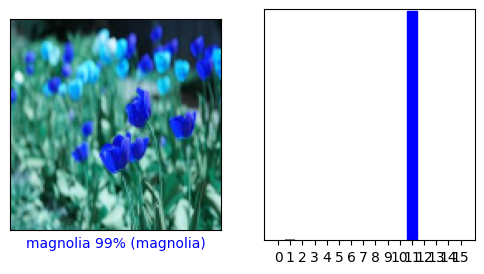

In [36]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], Y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  Y_test)
plt.show()

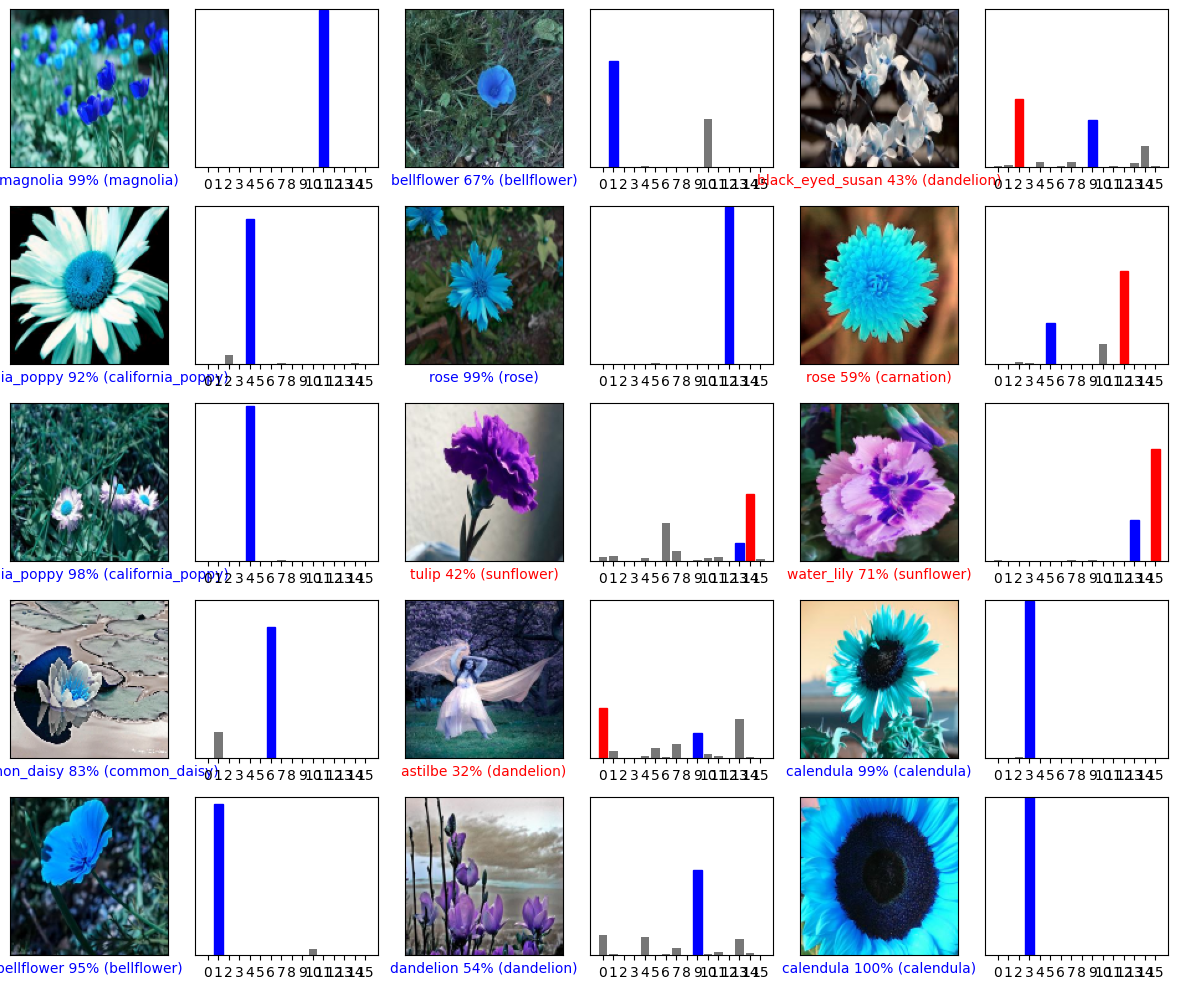

In [37]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], Y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], Y_test)
plt.tight_layout()
plt.show()

In [38]:
# Grab an image from the test dataset.
img = X_test[1]

print(img.shape)

(128, 128, 3)


In [39]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 128, 128, 3)


In [40]:
predictions_single = modelo.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 106ms/step
[[-2.4155073   6.561865    1.3360186  -3.590414    1.8270888  -2.3976164
   0.4187531  -4.6115546  -3.6255884  -0.644181    5.77364    -1.112176
   0.48053268  1.6252147  -1.6247857   0.6116877 ]]


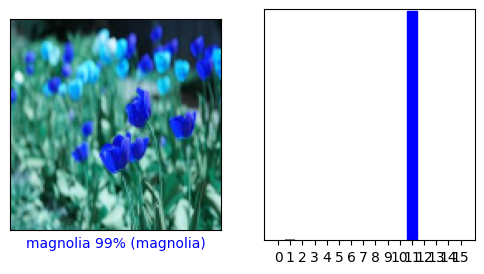

In [42]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], Y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  Y_test)
plt.show()

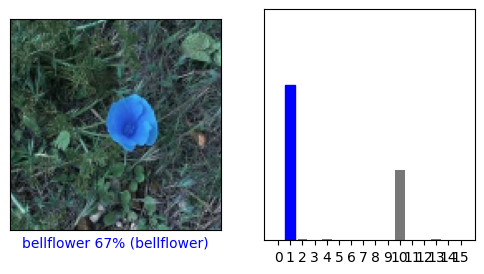

In [43]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], Y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  Y_test)
plt.show()

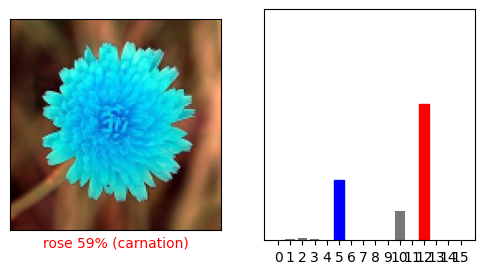

In [44]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], Y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  Y_test)
plt.show()

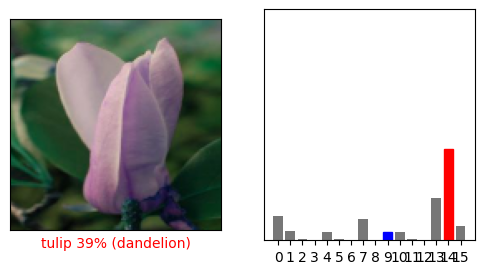

In [45]:
i = 344
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], Y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  Y_test)
plt.show()

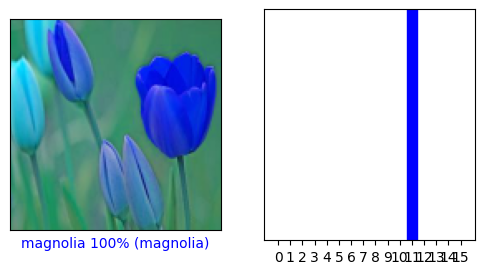

In [48]:
i = 2000
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], Y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  Y_test)
plt.show()

99/99 - 8s - loss: 1.1239 - accuracy: 0.6722 - 8s/epoch - 78ms/step


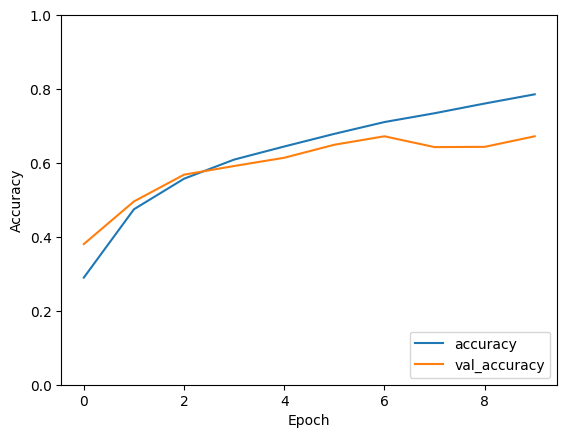

In [52]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = modelo.evaluate(X_test,  Y_test, verbose=2)